In [2]:
import importlib
from __imports__ import *
import data, LSTM_returns, optimization
importlib.reload(data)

<module 'data' from 'c:\\Users\\27904\\OneDrive\\桌面\\crypto\\AAA_Thursday1\\data\\__init__.py'>

In [3]:
df = data.load_asset('SOLUSDT', sampling='1d')
df = data.add_fear_and_greed(df)
# Restrict data after 2022
df = df[df.index >= '2024-01-01']
df

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,F&G,F&G category
Open time,,,,,,,,,,,
2024-01-01,101.72,109.93,101.44,109.91,4.403310e+06,4.647638e+08,563530,2246699.810,2.372047e+08,65.0,Greed
2024-01-02,109.93,116.95,106.02,106.73,7.831366e+06,8.727018e+08,1029366,4008477.700,4.468272e+08,71.0,Greed
2024-01-03,106.72,109.90,85.00,98.52,1.222106e+07,1.229681e+09,1428502,6232536.620,6.274338e+08,70.0,Greed
2024-01-04,98.52,108.15,96.60,104.91,7.235483e+06,7.374641e+08,828177,3653791.900,3.724890e+08,68.0,Greed
2024-01-05,104.91,105.48,95.23,99.94,6.703567e+06,6.706546e+08,792668,3291710.910,3.293771e+08,72.0,Greed
...,...,...,...,...,...,...,...,...,...,...,...
2025-03-27,137.35,140.22,135.63,138.43,2.466163e+06,3.412542e+08,1324639,1238086.879,1.714153e+08,40.0,Fear
2025-03-28,138.44,139.05,127.69,129.49,3.892191e+06,5.155013e+08,1575782,1791046.217,2.373760e+08,44.0,Fear
2025-03-29,129.50,130.54,122.68,124.58,2.610066e+06,3.296431e+08,1178810,1302977.748,1.646235e+08,26.0,Fear


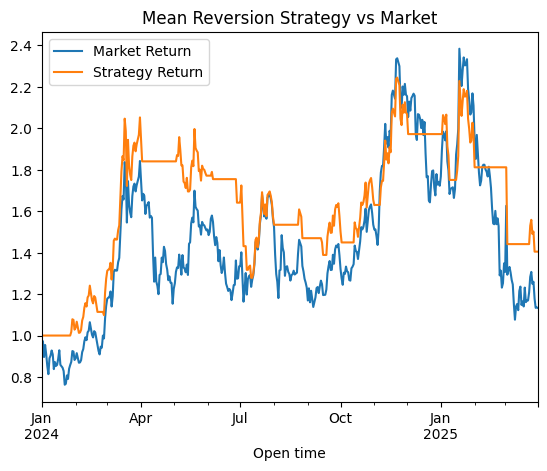

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load df
price = df['Close']

# Calculate Moving Average and Standard Deviation
window = 20
moving_avg = price.rolling(window=window).mean()
moving_std = price.rolling(window=window).std()

# Calculate Z-score
z_score = (price - moving_avg) / moving_std

# Strategy: Buy when Z < -1, Sell when Z > 0
df['Position'] = 0
df.loc[z_score < -1, 'Position'] = 0  # Long
df.loc[z_score > 0, 'Position'] = 1   # Exit long

# Shift position for returns
df['Position'] = df['Position'].shift(1)

# Calculate returns
df['Market Return'] = price.pct_change()
df['Strategy Return'] = df['Position'] * df['Market Return']

# Cumulative returns
(1 + df[['Market Return', 'Strategy Return']]).cumprod().plot()
plt.title('Mean Reversion Strategy vs Market')
plt.show()




In [5]:
df["Position"].sum()

np.float64(208.0)

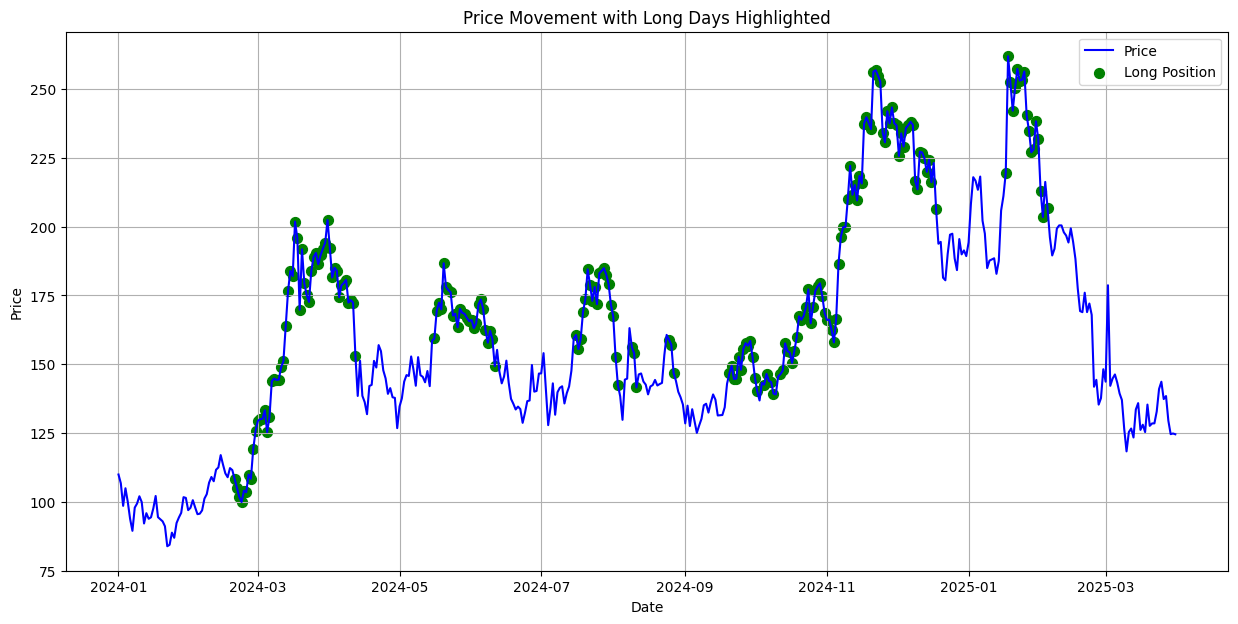

In [6]:
import matplotlib.pyplot as plt

# Plot setup
plt.figure(figsize=(15,7))

# Plot price
plt.plot(df.index, df['Close'], label='Price', color='blue')

# Highlight long days
long_days = df['Position'] == 1
plt.scatter(df.index[long_days], df['Close'][long_days], 
            label='Long Position', color='green', marker='o', s=50)

# Titles and labels
plt.title('Price Movement with Long Days Highlighted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


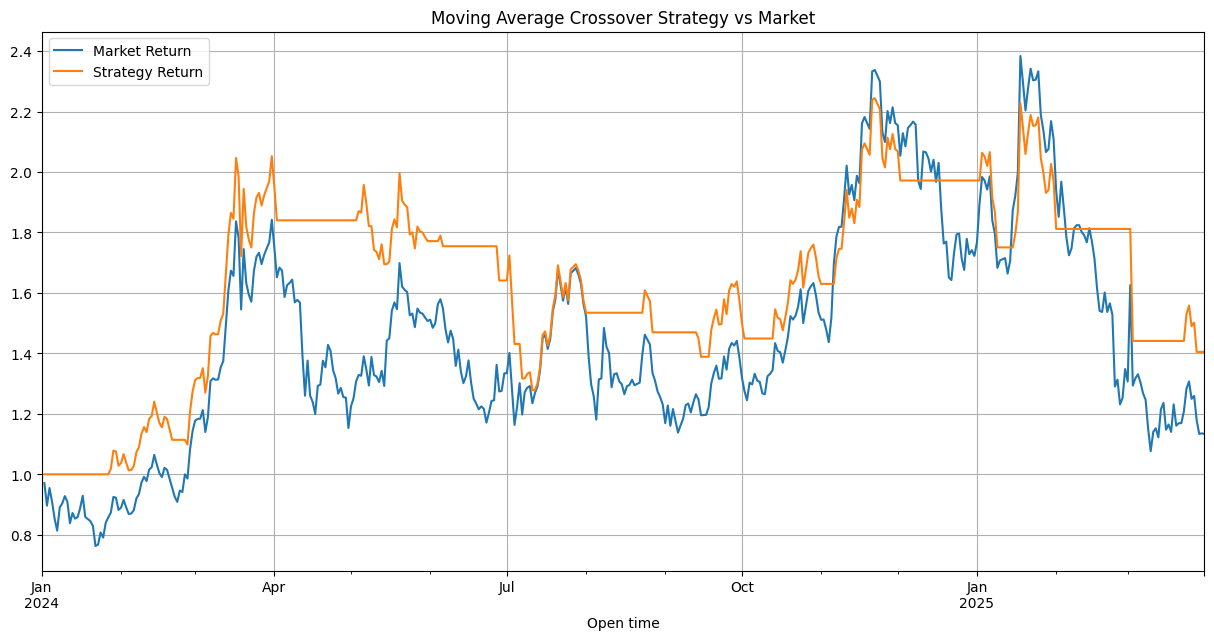

In [7]:
price = df['Close']

# Calculate Moving Average
window = 20  # e.g., 50 days
sma = price.rolling(window=window).mean()

# Trading signals
df['Position'] = 0
df['SMA'] = sma

# Buy signal: price crosses above SMA
df.loc[price > sma, 'Position'] = 1

# Sell signal: price crosses below SMA
df.loc[price <= sma, 'Position'] = 0

# Shift position for returns
df['Position'] = df['Position'].shift(1)

# Returns
df['Market Return'] = price.pct_change()
df['Strategy Return'] = df['Position'] * df['Market Return']

# Plot cumulative returns
(1 + df[['Market Return', 'Strategy Return']]).cumprod().plot(figsize=(15,7))
plt.title('Moving Average Crossover Strategy vs Market')
plt.grid(True)
plt.show()

